# Comparing 2 Morans Strategies

## Imports

In [18]:
import metab_iso_processing as processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get Valid Metabs

In [2]:
metab_processor = processing.MIProcessing(absolute_data_path = "/Users/goldfei/Documents/generated-data", relative_data_path='brain-m0-no-log', morans_path = 'valid-metabs-brain-glucose.txt')

Initializing IsoLearner
Generate Filepath List Triggered


In [3]:
valid_metabolites = metab_processor.generate_valid_metabs()

generate_valid_metabs triggered
map_poor_unlabeled_metabolites triggered
============> Valid Metabolites Calculated
good_metabs ['?-N-Acetylglucosamine', 'ADP', 'ADP-D-glucose', 'AMP', 'Anserine', 'Arachidic acid', 'CDP-choline', 'CTP', 'Carnosine', 'Chenodeoxycholic acid', 'D-Pantethine', 'Docosahexaenoic acid(DHA)', 'Glycodeoxycholic acid', 'Glycoursodeoxycholic acid', 'IDP', 'IMP', 'Inosine 5-triphosphate', 'Lithocholic acid', 'Melatonin', 'Myristic acid', 'N-Acetylaspartic acid', 'N-Acetylneuraminic acid', 'NAD+', 'NADH', 'O-Phosphorylethanolamine', 'O-acetyl-L-serine', 'Retinoic Acid', 'Ribothymidine', 'Taurodeoxycholic acid', 'Tricarballylic acid', 'UMP', "adenosine 5'-phosphosulfate", 'aspartate', 'citrate/isocitrate', 'dATP', 'dCTP', 'dGMP', 'dTTP', 'dUTP', 'deoxyribose-phosphate', 'dephospho-CoA', 'elcosapentaenoic acid', 'fructose-1-6-bisphosphate', 'glucose-1-phosphate', 'glutamate', 'glutathione', 'riboflavin', 'sn-glycerol-3-phosphate', 'taurine', 'trehalose-6-Phosphate']


## Get Valid Isos

In [4]:
iso_processor = processing.MIProcessing(absolute_data_path = "/Users/goldfei/Documents/generated-data", relative_data_path='brain-m0-no-log', morans_path = 'valid-isos-brain-glucose.txt')

Initializing IsoLearner
Generate Filepath List Triggered


In [5]:
valid_isos = iso_processor.generate_valid_metabs()

generate_valid_metabs triggered
map_poor_unlabeled_metabolites triggered
============> Valid Metabolites Calculated
good_metabs ['?-N-Acetylglucosamine m+04', '?-N-Acetylglucosamine m+08', 'ADP m+00', 'ADP m+04', 'ADP m+05', 'ADP m+06', 'ADP m+07', 'ADP m+08', 'ADP m+09', 'ADP m+10', 'AMP m+09', 'AMP m+10', 'Anserine m+04', 'Anserine m+06', 'Anserine m+07', 'Anserine m+08', 'Anserine m+09', 'Anserine m+10', 'Carnosine m+03', 'Carnosine m+04', 'Carnosine m+06', 'Carnosine m+07', 'Carnosine m+08', 'Carnosine m+09', 'Cyclic-ADP-ribose m+00', 'Cyclic-ADP-ribose m+03', 'Cyclic-ADP-ribose m+04', 'Cyclic-ADP-ribose m+05', 'Cyclic-ADP-ribose m+06', 'Cyclic-ADP-ribose m+07', 'Cyclic-ADP-ribose m+08', 'Cyclic-ADP-ribose m+09', 'Cyclic-ADP-ribose m+10', 'Cyclic-ADP-ribose m+11', 'Cyclic-ADP-ribose m+12', 'Cyclic-ADP-ribose m+13', 'Cyclic-ADP-ribose m+14', 'Cyclic-ADP-ribose m+15', 'Docosahexaenoic acid(DHA) m+03', 'Docosahexaenoic acid(DHA) m+04', 'Docosahexaenoic acid(DHA) m+05', 'Docosahexaenoi

## How many good Isos are we keeping per metabolite?

In [6]:
good_iso_count = {}

for metabolite in valid_metabolites:
    count = sum(1 for iso in valid_isos if iso.startswith(metabolite + " m+"))
    good_iso_count[metabolite] = count

In [7]:
good_iso_count

{'?-N-Acetylglucosamine': 2,
 'ADP': 8,
 'ADP-D-glucose': 0,
 'AMP': 2,
 'Anserine': 6,
 'Arachidic acid': 0,
 'CDP-choline': 0,
 'CTP': 0,
 'Carnosine': 6,
 'Chenodeoxycholic acid': 0,
 'D-Pantethine': 0,
 'Docosahexaenoic acid(DHA)': 20,
 'Glycodeoxycholic acid': 0,
 'Glycoursodeoxycholic acid': 0,
 'IDP': 0,
 'IMP': 4,
 'Inosine 5-triphosphate': 0,
 'Lithocholic acid': 0,
 'Melatonin': 0,
 'Myristic acid': 0,
 'N-Acetylaspartic acid': 1,
 'N-Acetylneuraminic acid': 6,
 'NAD+': 0,
 'NADH': 0,
 'O-Phosphorylethanolamine': 1,
 'O-acetyl-L-serine': 0,
 'Retinoic Acid': 0,
 'Ribothymidine': 4,
 'Taurodeoxycholic acid': 23,
 'Tricarballylic acid': 0,
 'UMP': 2,
 "adenosine 5'-phosphosulfate": 0,
 'aspartate': 0,
 'citrate/isocitrate': 0,
 'dATP': 0,
 'dCTP': 0,
 'dGMP': 2,
 'dTTP': 0,
 'dUTP': 0,
 'deoxyribose-phosphate': 0,
 'dephospho-CoA': 0,
 'elcosapentaenoic acid': 0,
 'fructose-1-6-bisphosphate': 3,
 'glucose-1-phosphate': 0,
 'glutamate': 0,
 'glutathione': 3,
 'riboflavin': 0,
 '

In [8]:
all_isos = iso_processor.get_all_metabs()

In [9]:
all_iso_count = {}

for metabolite in valid_metabolites:
    count = sum(1 for iso in all_isos[0] if iso.startswith(metabolite + " m+"))
    all_iso_count[metabolite] = count

In [10]:
all_iso_count

{'?-N-Acetylglucosamine': 9,
 'ADP': 11,
 'ADP-D-glucose': 17,
 'AMP': 11,
 'Anserine': 11,
 'Arachidic acid': 21,
 'CDP-choline': 15,
 'CTP': 10,
 'Carnosine': 10,
 'Chenodeoxycholic acid': 25,
 'D-Pantethine': 23,
 'Docosahexaenoic acid(DHA)': 23,
 'Glycodeoxycholic acid': 27,
 'Glycoursodeoxycholic acid': 27,
 'IDP': 11,
 'IMP': 11,
 'Inosine 5-triphosphate': 8,
 'Lithocholic acid': 25,
 'Melatonin': 14,
 'Myristic acid': 15,
 'N-Acetylaspartic acid': 7,
 'N-Acetylneuraminic acid': 12,
 'NAD+': 22,
 'NADH': 22,
 'O-Phosphorylethanolamine': 3,
 'O-acetyl-L-serine': 6,
 'Retinoic Acid': 21,
 'Ribothymidine': 11,
 'Taurodeoxycholic acid': 24,
 'Tricarballylic acid': 7,
 'UMP': 10,
 "adenosine 5'-phosphosulfate": 11,
 'aspartate': 5,
 'citrate/isocitrate': 7,
 'dATP': 10,
 'dCTP': 10,
 'dGMP': 11,
 'dTTP': 11,
 'dUTP': 10,
 'deoxyribose-phosphate': 6,
 'dephospho-CoA': 22,
 'elcosapentaenoic acid': 20,
 'fructose-1-6-bisphosphate': 7,
 'glucose-1-phosphate': 7,
 'glutamate': 6,
 'glutat

In [13]:
bad_isos = {metabolite: all_iso_count[metabolite] - good_iso_count[metabolite] for metabolite in all_iso_count}

In [14]:
bad_isos

{'?-N-Acetylglucosamine': 7,
 'ADP': 3,
 'ADP-D-glucose': 17,
 'AMP': 9,
 'Anserine': 5,
 'Arachidic acid': 21,
 'CDP-choline': 15,
 'CTP': 10,
 'Carnosine': 4,
 'Chenodeoxycholic acid': 25,
 'D-Pantethine': 23,
 'Docosahexaenoic acid(DHA)': 3,
 'Glycodeoxycholic acid': 27,
 'Glycoursodeoxycholic acid': 27,
 'IDP': 11,
 'IMP': 7,
 'Inosine 5-triphosphate': 8,
 'Lithocholic acid': 25,
 'Melatonin': 14,
 'Myristic acid': 15,
 'N-Acetylaspartic acid': 6,
 'N-Acetylneuraminic acid': 6,
 'NAD+': 22,
 'NADH': 22,
 'O-Phosphorylethanolamine': 2,
 'O-acetyl-L-serine': 6,
 'Retinoic Acid': 21,
 'Ribothymidine': 7,
 'Taurodeoxycholic acid': 1,
 'Tricarballylic acid': 7,
 'UMP': 8,
 "adenosine 5'-phosphosulfate": 11,
 'aspartate': 5,
 'citrate/isocitrate': 7,
 'dATP': 10,
 'dCTP': 10,
 'dGMP': 9,
 'dTTP': 11,
 'dUTP': 10,
 'deoxyribose-phosphate': 6,
 'dephospho-CoA': 22,
 'elcosapentaenoic acid': 20,
 'fructose-1-6-bisphosphate': 4,
 'glucose-1-phosphate': 7,
 'glutamate': 6,
 'glutathione': 8,


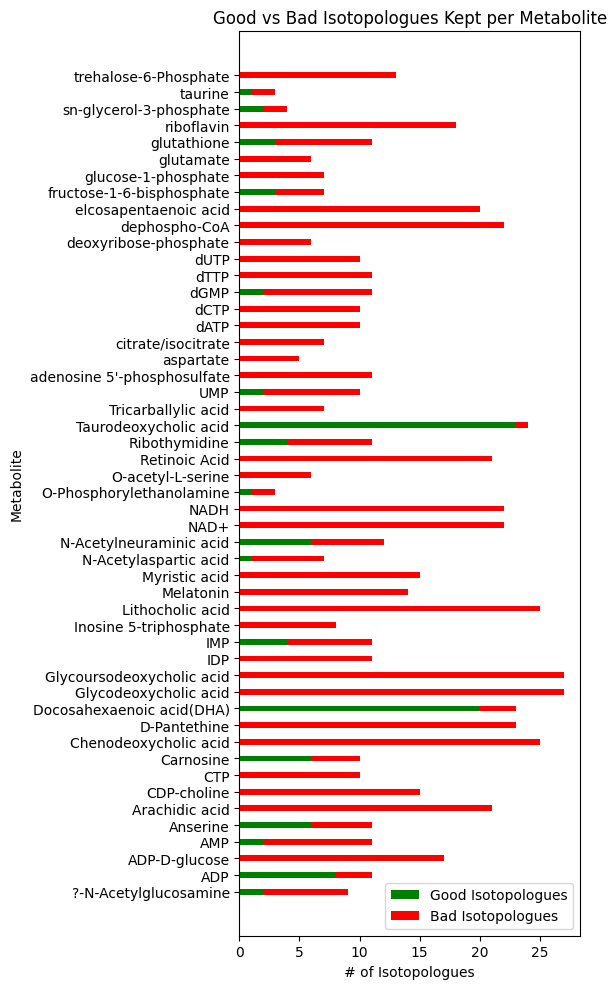

In [35]:
bar_width = 0.35
index = range(len(all_iso_count))

fig, ax = plt.subplots(figsize=(6, 10))

bar1 = ax.barh(index, good_iso_count.values(), bar_width, label='Good Isotopologues', color='g')
bar2 = ax.barh(index, bad_isos.values(), bar_width, left=list(good_iso_count.values()), label='Bad Isotopologues', color='r')

ax.set_ylabel('Metabolite')
ax.set_xlabel('# of Isotopologues')
ax.set_title('Good vs Bad Isotopologues Kept per Metabolite')
ax.set_yticks(index)
ax.set_yticklabels(all_iso_count.keys())
ax.legend()

plt.tight_layout()
plt.show()